In [ ]:
!nvidia-smi

Wed Apr 23 01:23:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6FOXJj9xbPzKbuimLTBA")
project = rf.workspace("custom-ewaste-management").project("custom-e-waste-segregation")
version = project.version(2)
dataset = version.download("yolov12")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Custom-E-waste-segregation-2 in yolov12:: 100%|██████████| 1304/1304 [00:00<00:00, 9049.75it/s]


In [7]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/107.7 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolo12n.pt data=/content/Custom-E-waste-segregation-2/data.yaml epochs=175 imgsz=640 plots=True

100% 5.34M/5.34M [00:00<00:00, 103MB/s]
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/content/Custom-E-waste-segregation-2/data.yaml, epochs=175, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Custom-E-waste-segregation-2/data.yaml

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,561,213 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1026.4±249.7 MB/s, size: 24.7 KB)
val: Scanning /content/Custom-E-waste-segregation-2/valid/labels.cache... 25 images, 10 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.97it/s]
                   all         25         17      0.847      0.576      0.953      0.718
                  iron          9         11       0.89      0.727      0.868      0.501
            light bulb          1          1          1          0      0.995      0.895
       washing machine          5          5       0.65          1      0.995      0.758
Speed: 0.3ms preprocess, 16.2ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more 

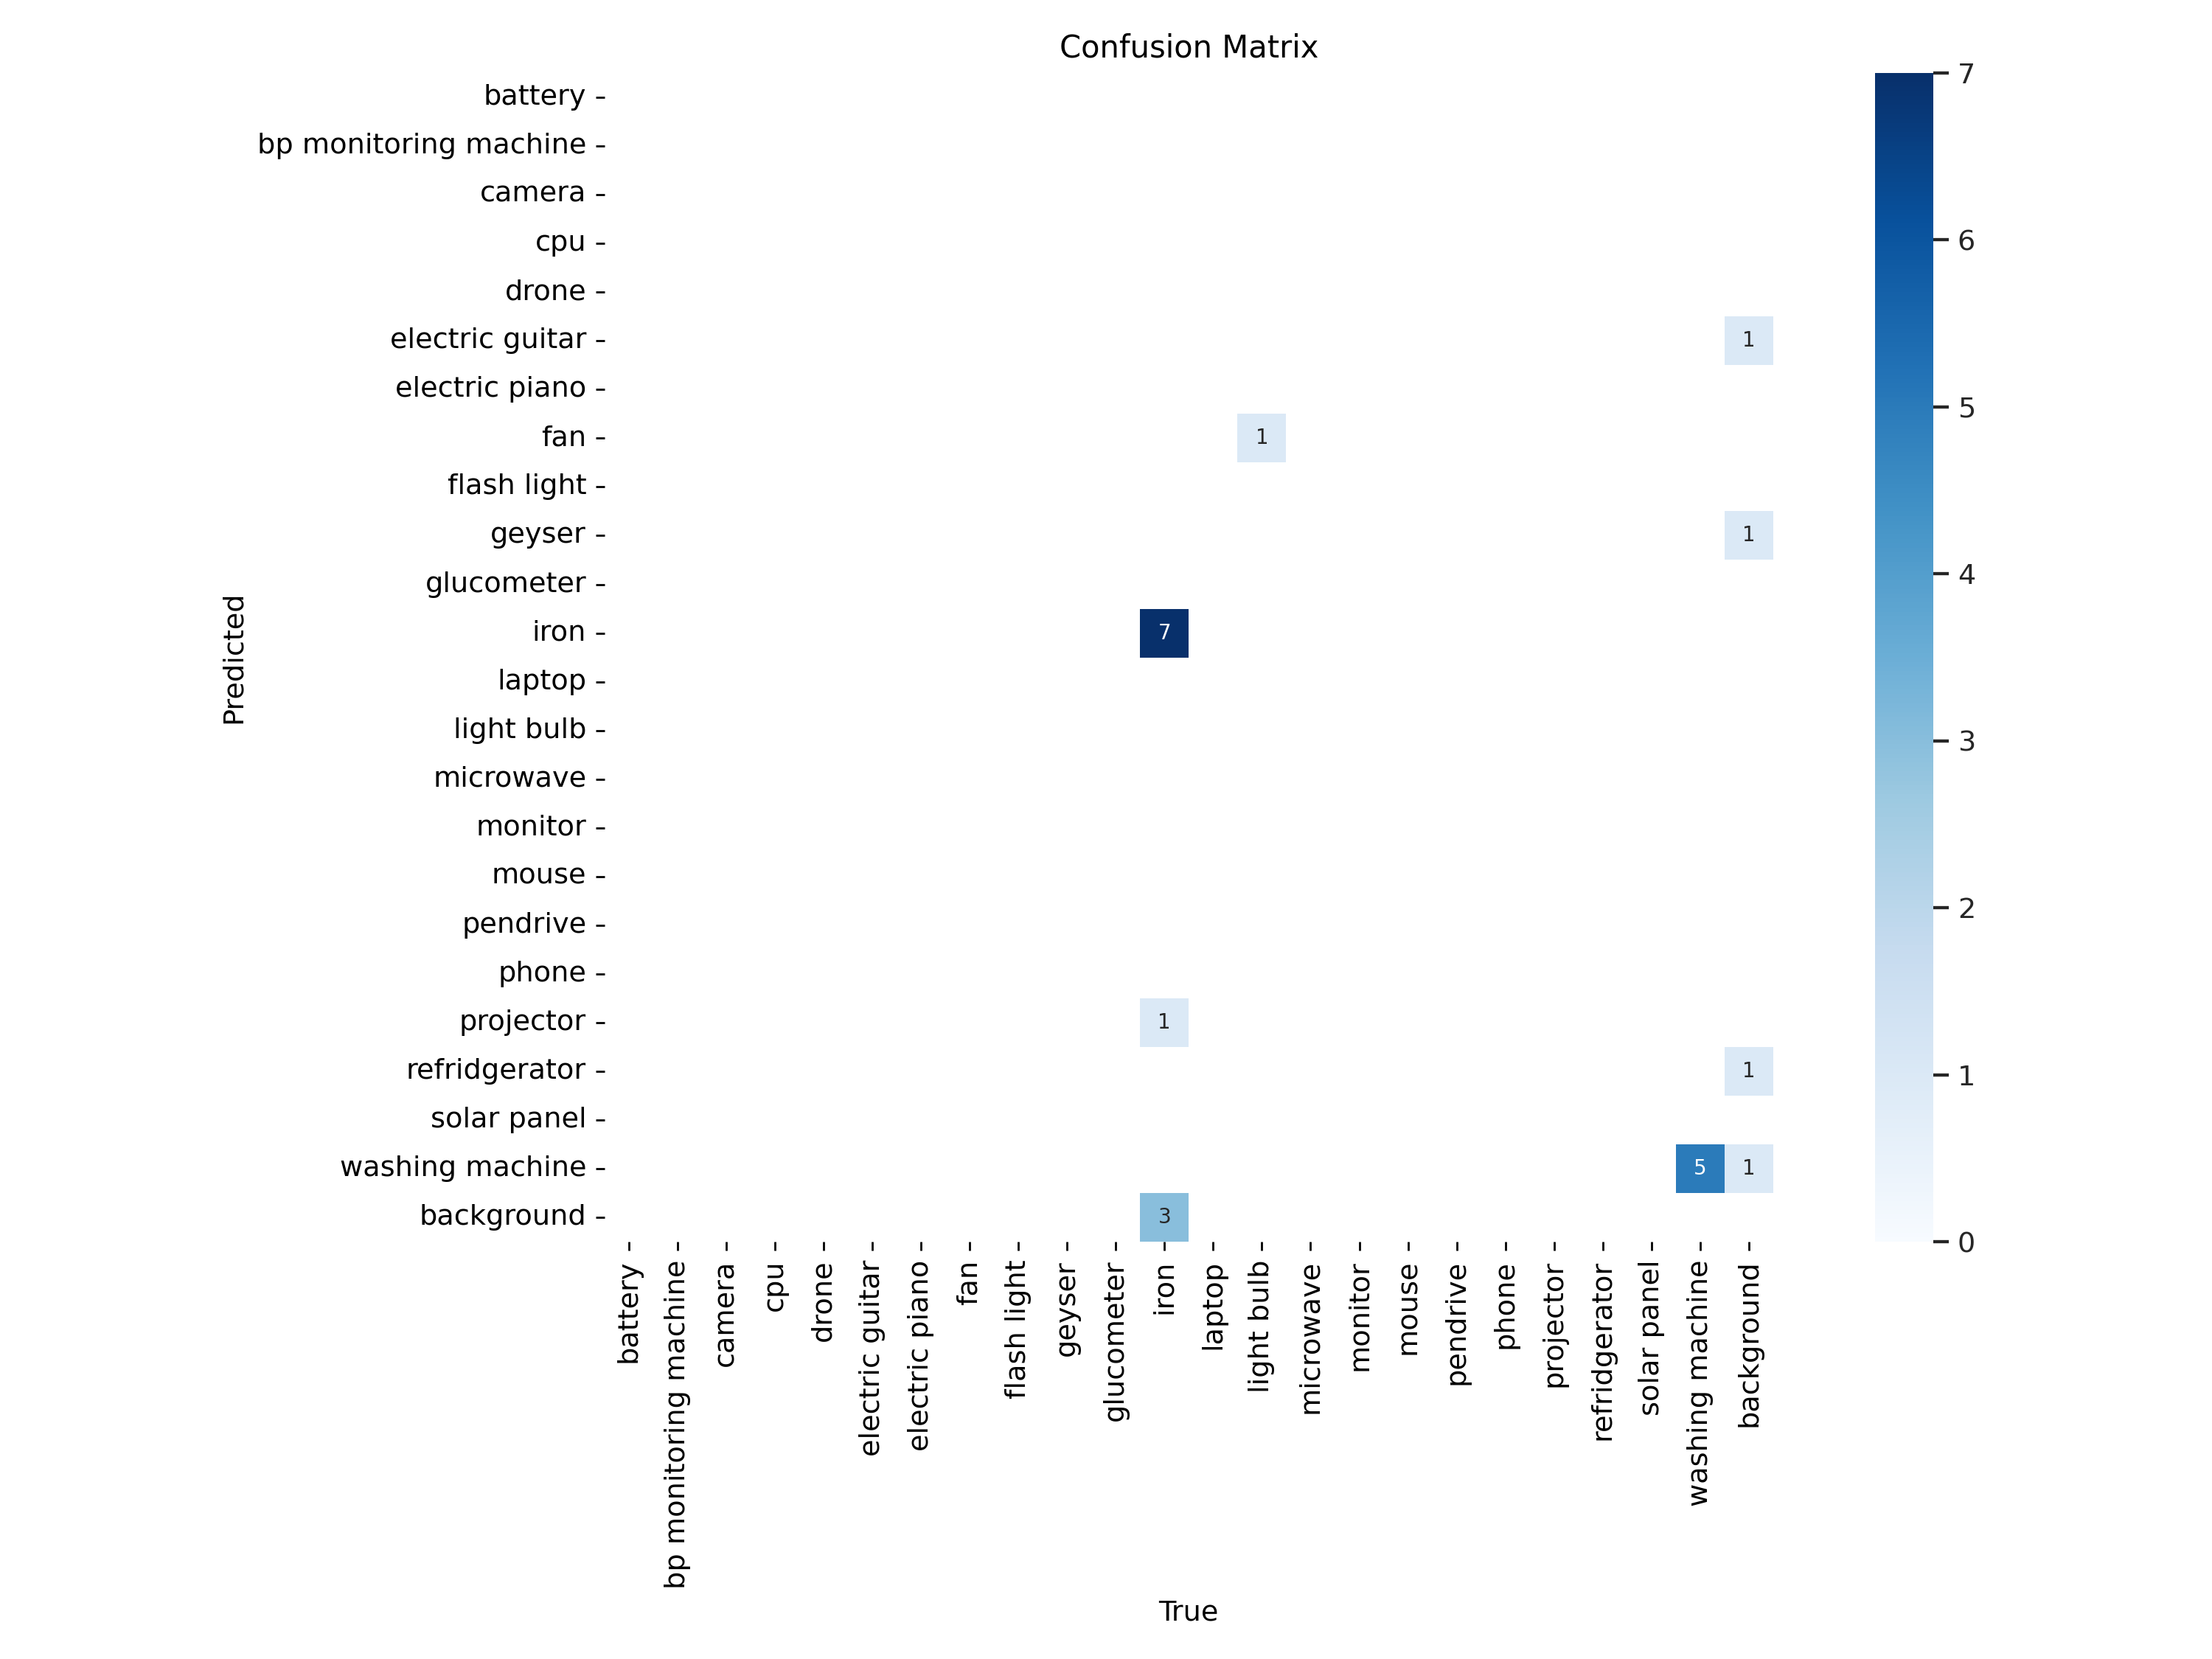

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=1000)

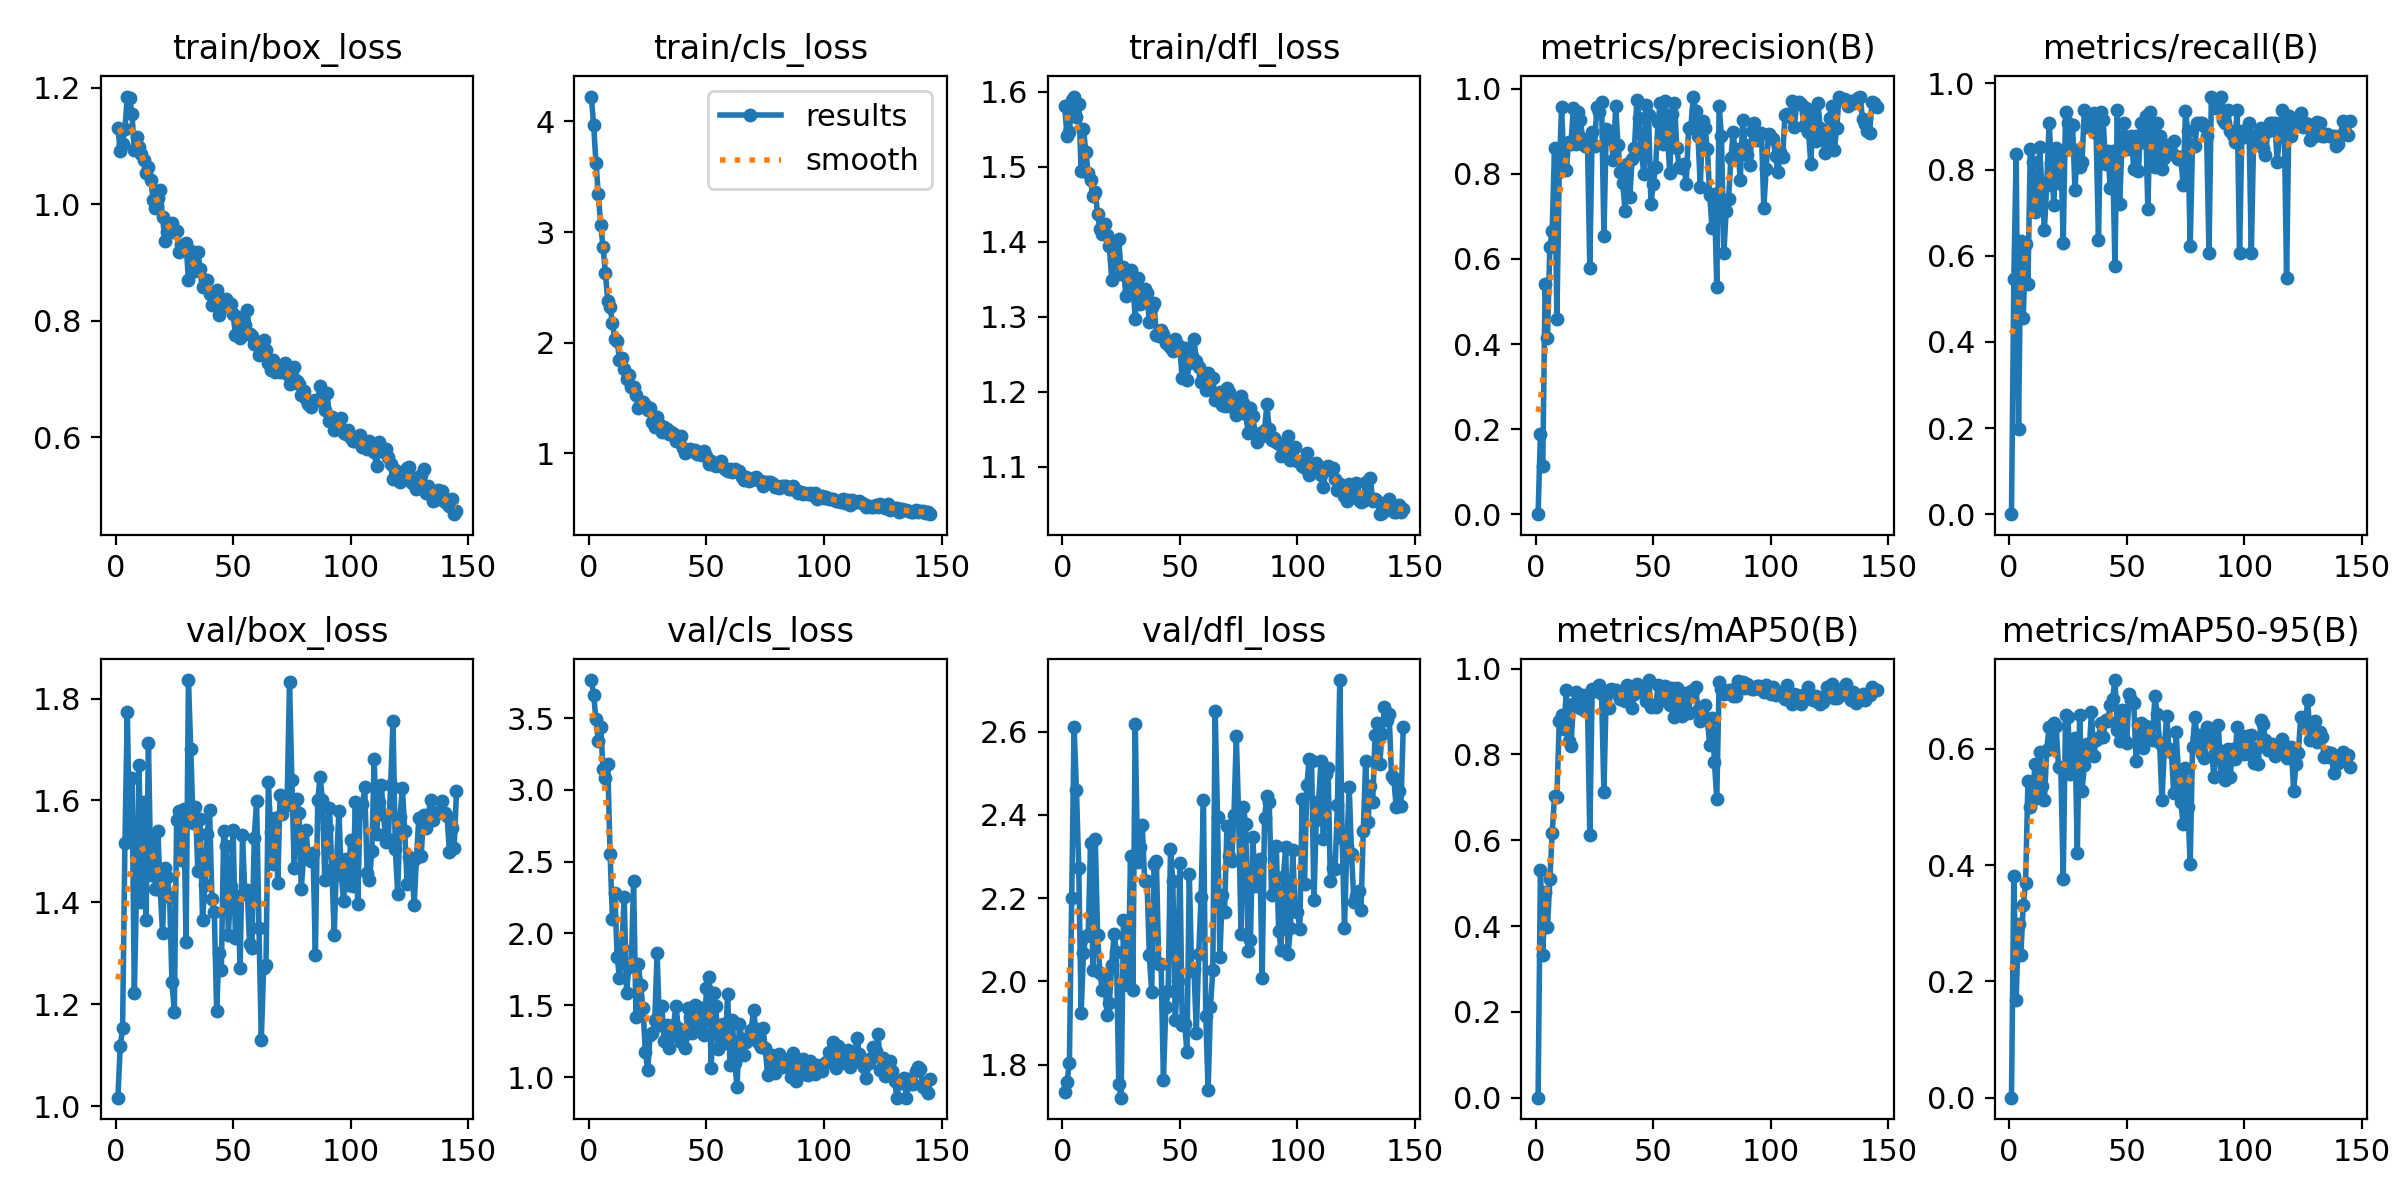

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/results.png', width=1000)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.18 source=/content/10.png save=True

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,561,213 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/10.png: 416x640 1 camera, 49.9ms
Speed: 2.7ms preprocess, 49.9ms inference, 136.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


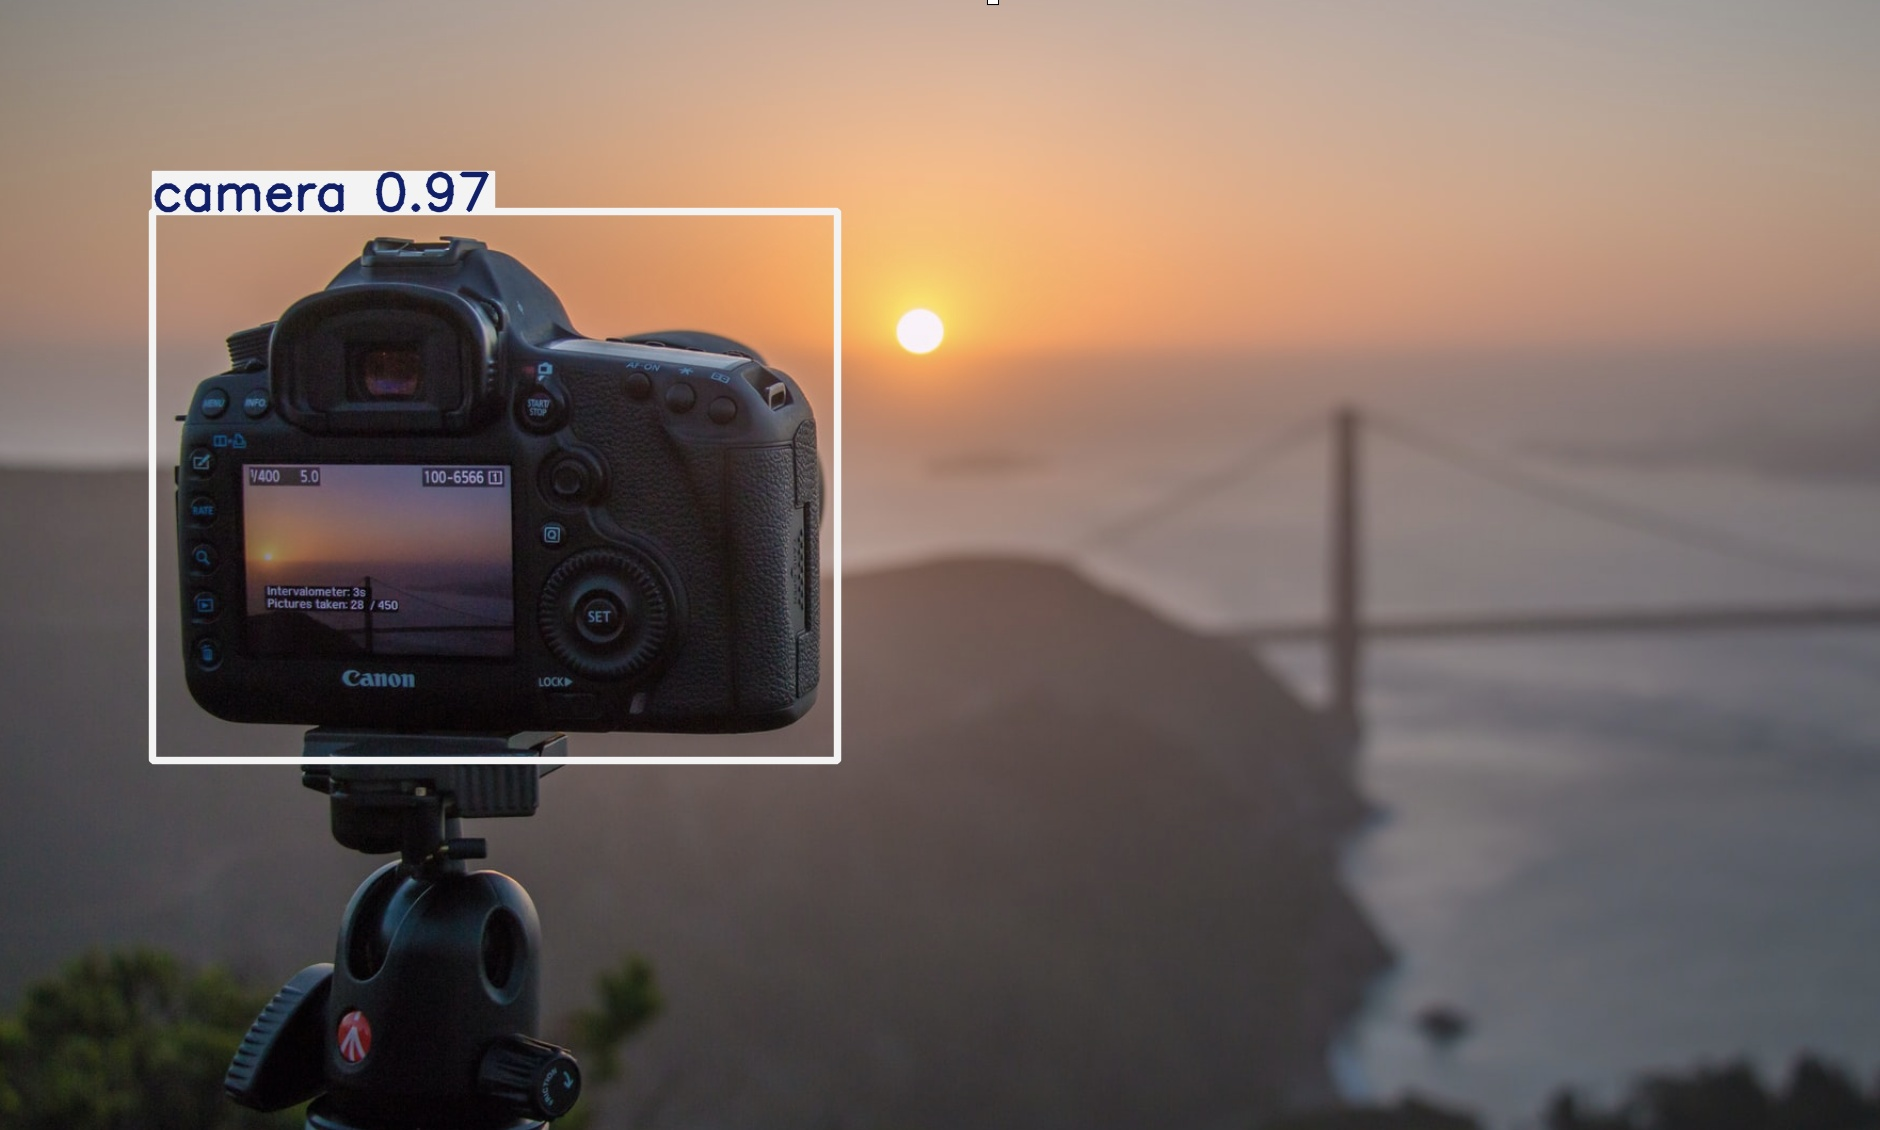

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")

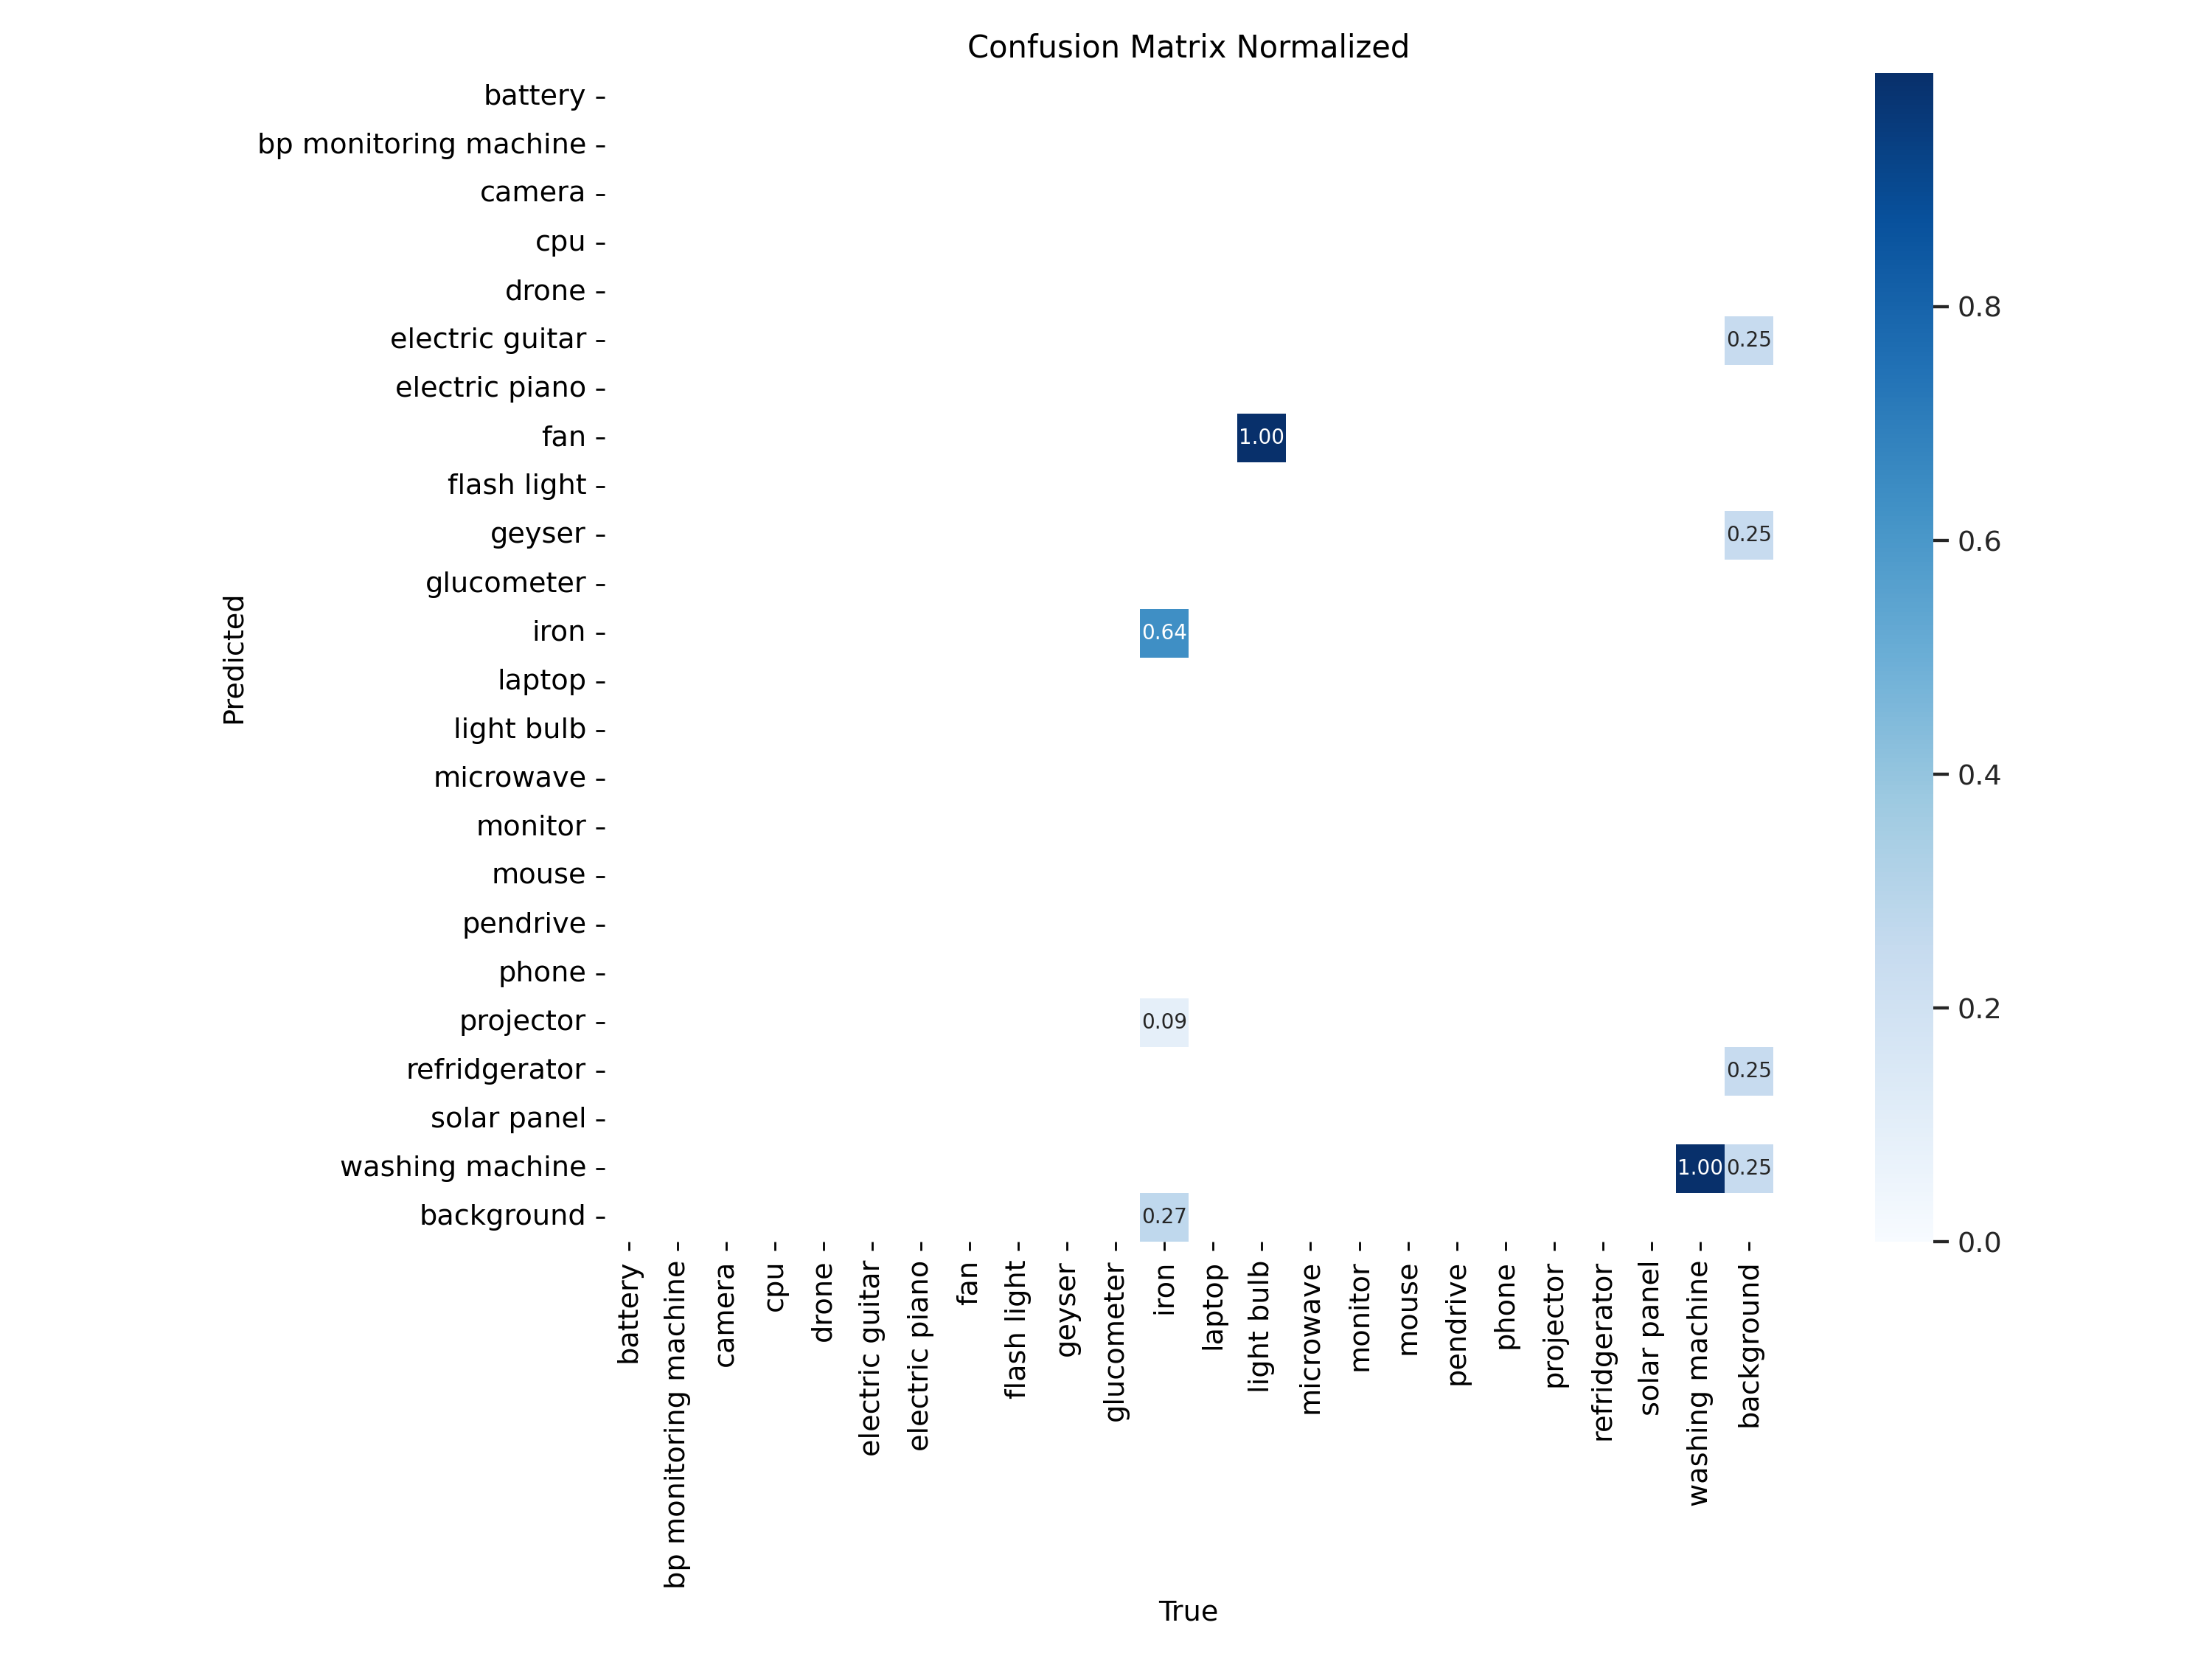

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=1000)

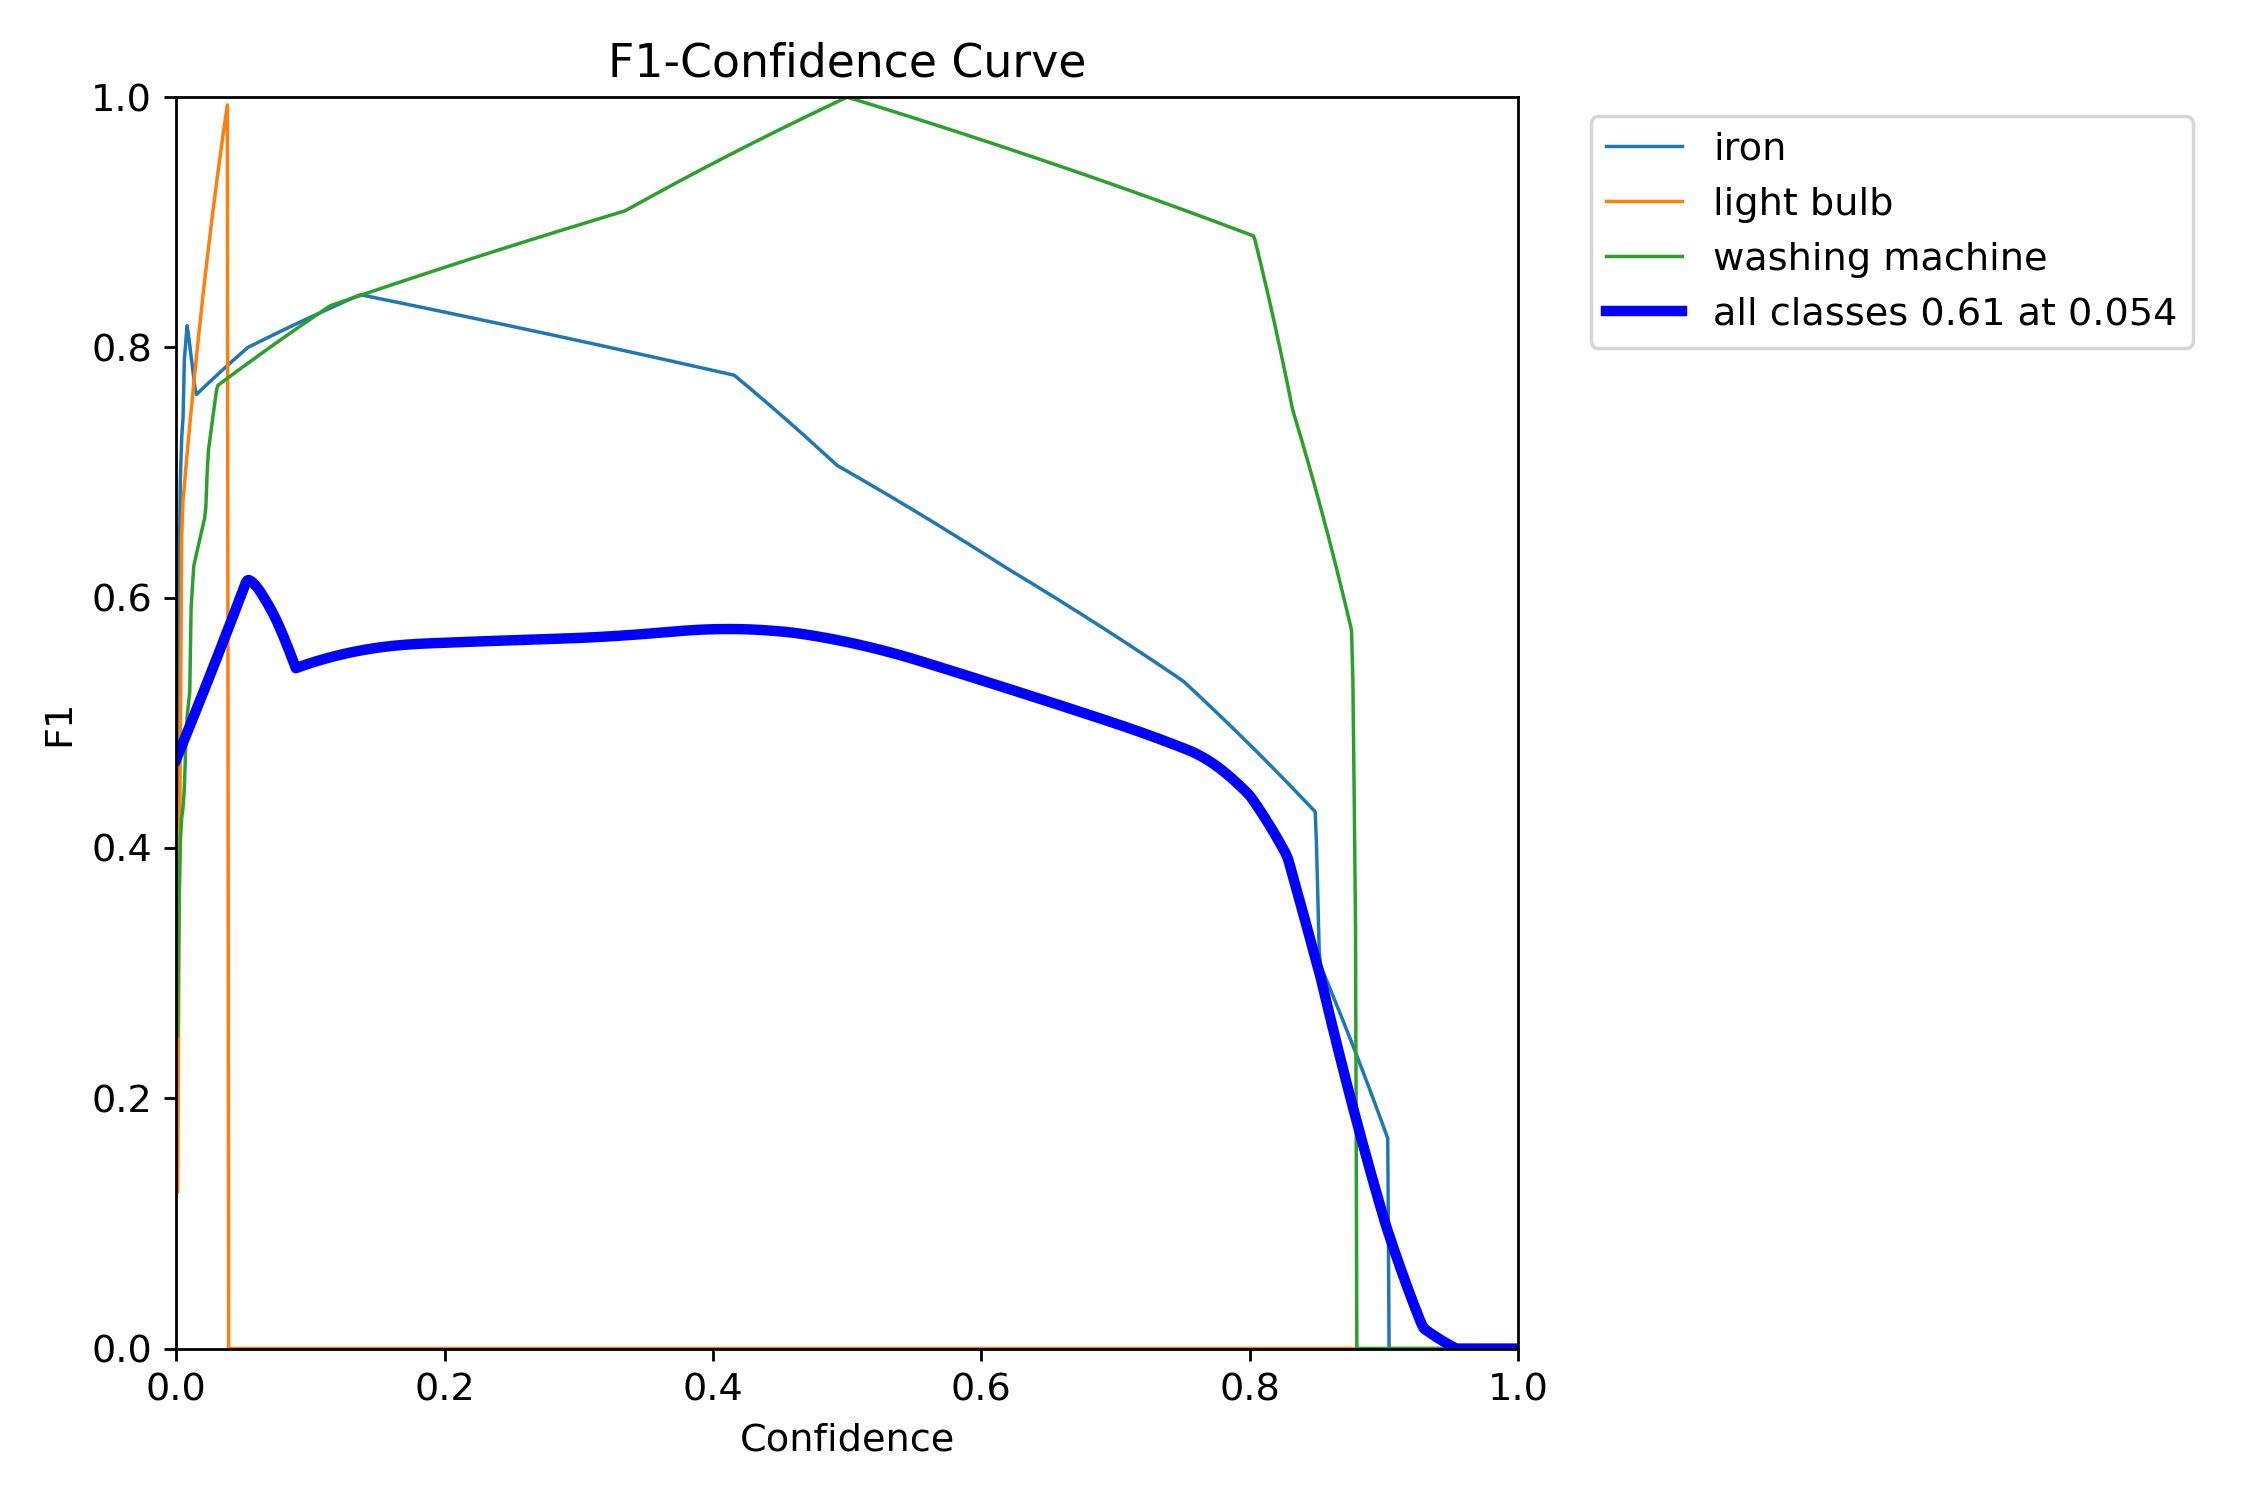

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/F1_curve.png', width=1000)

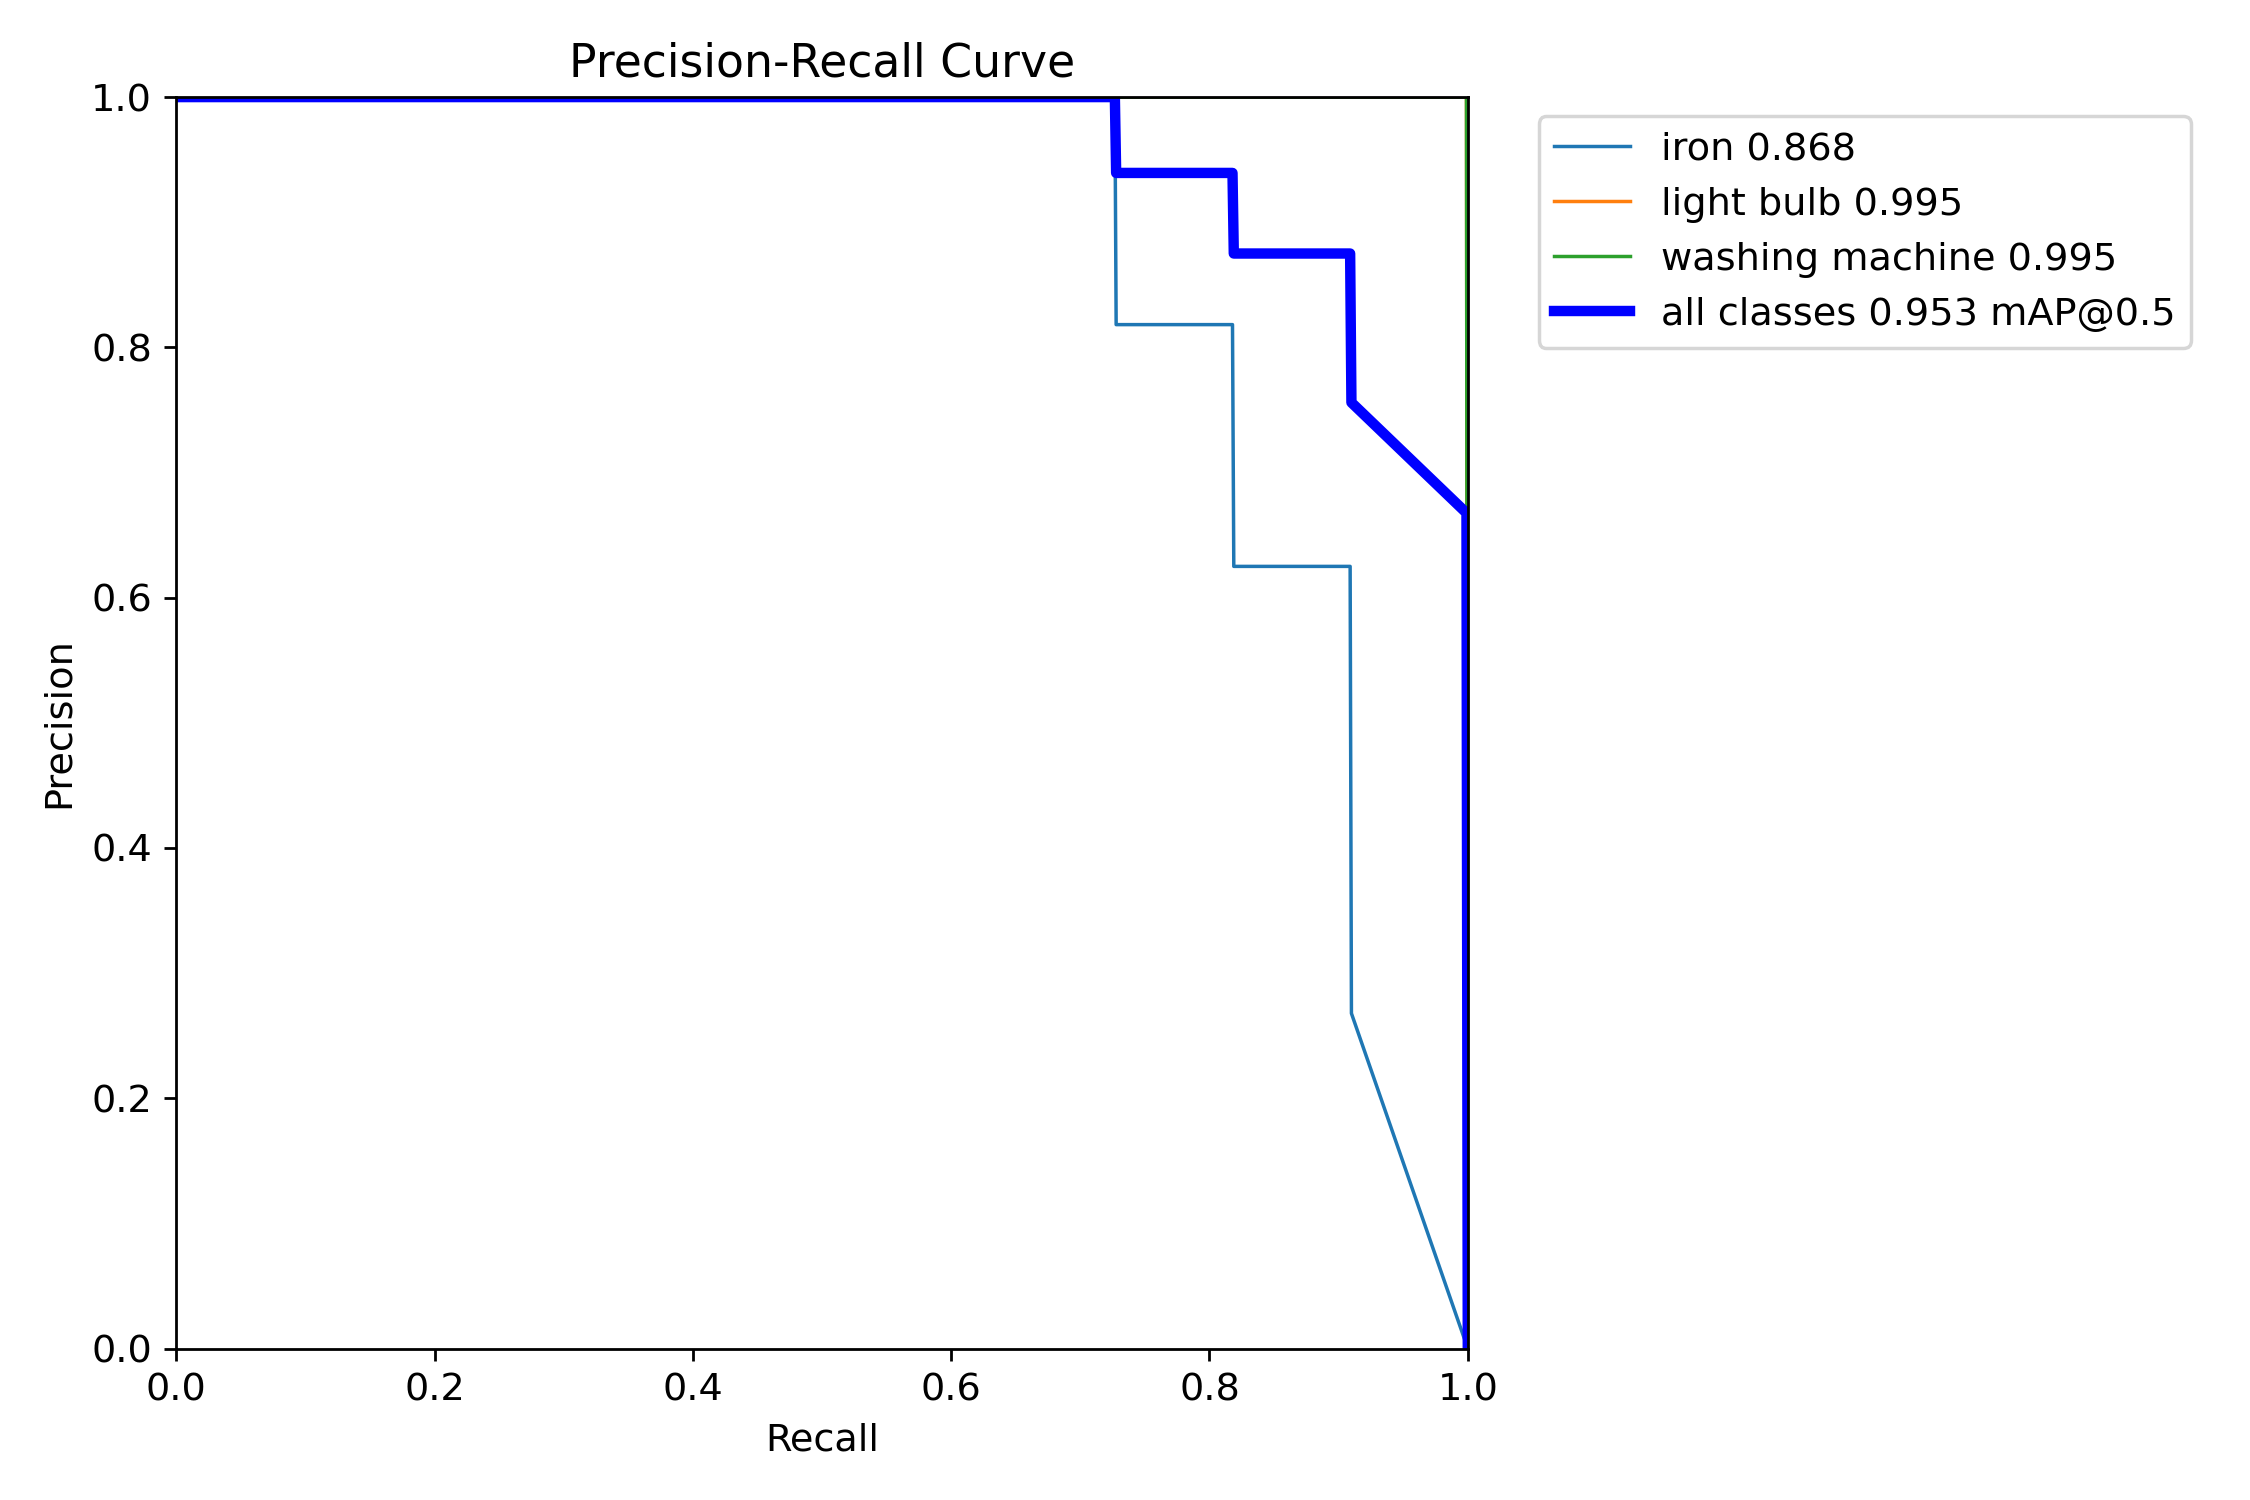

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/PR_curve.png', width=1000)

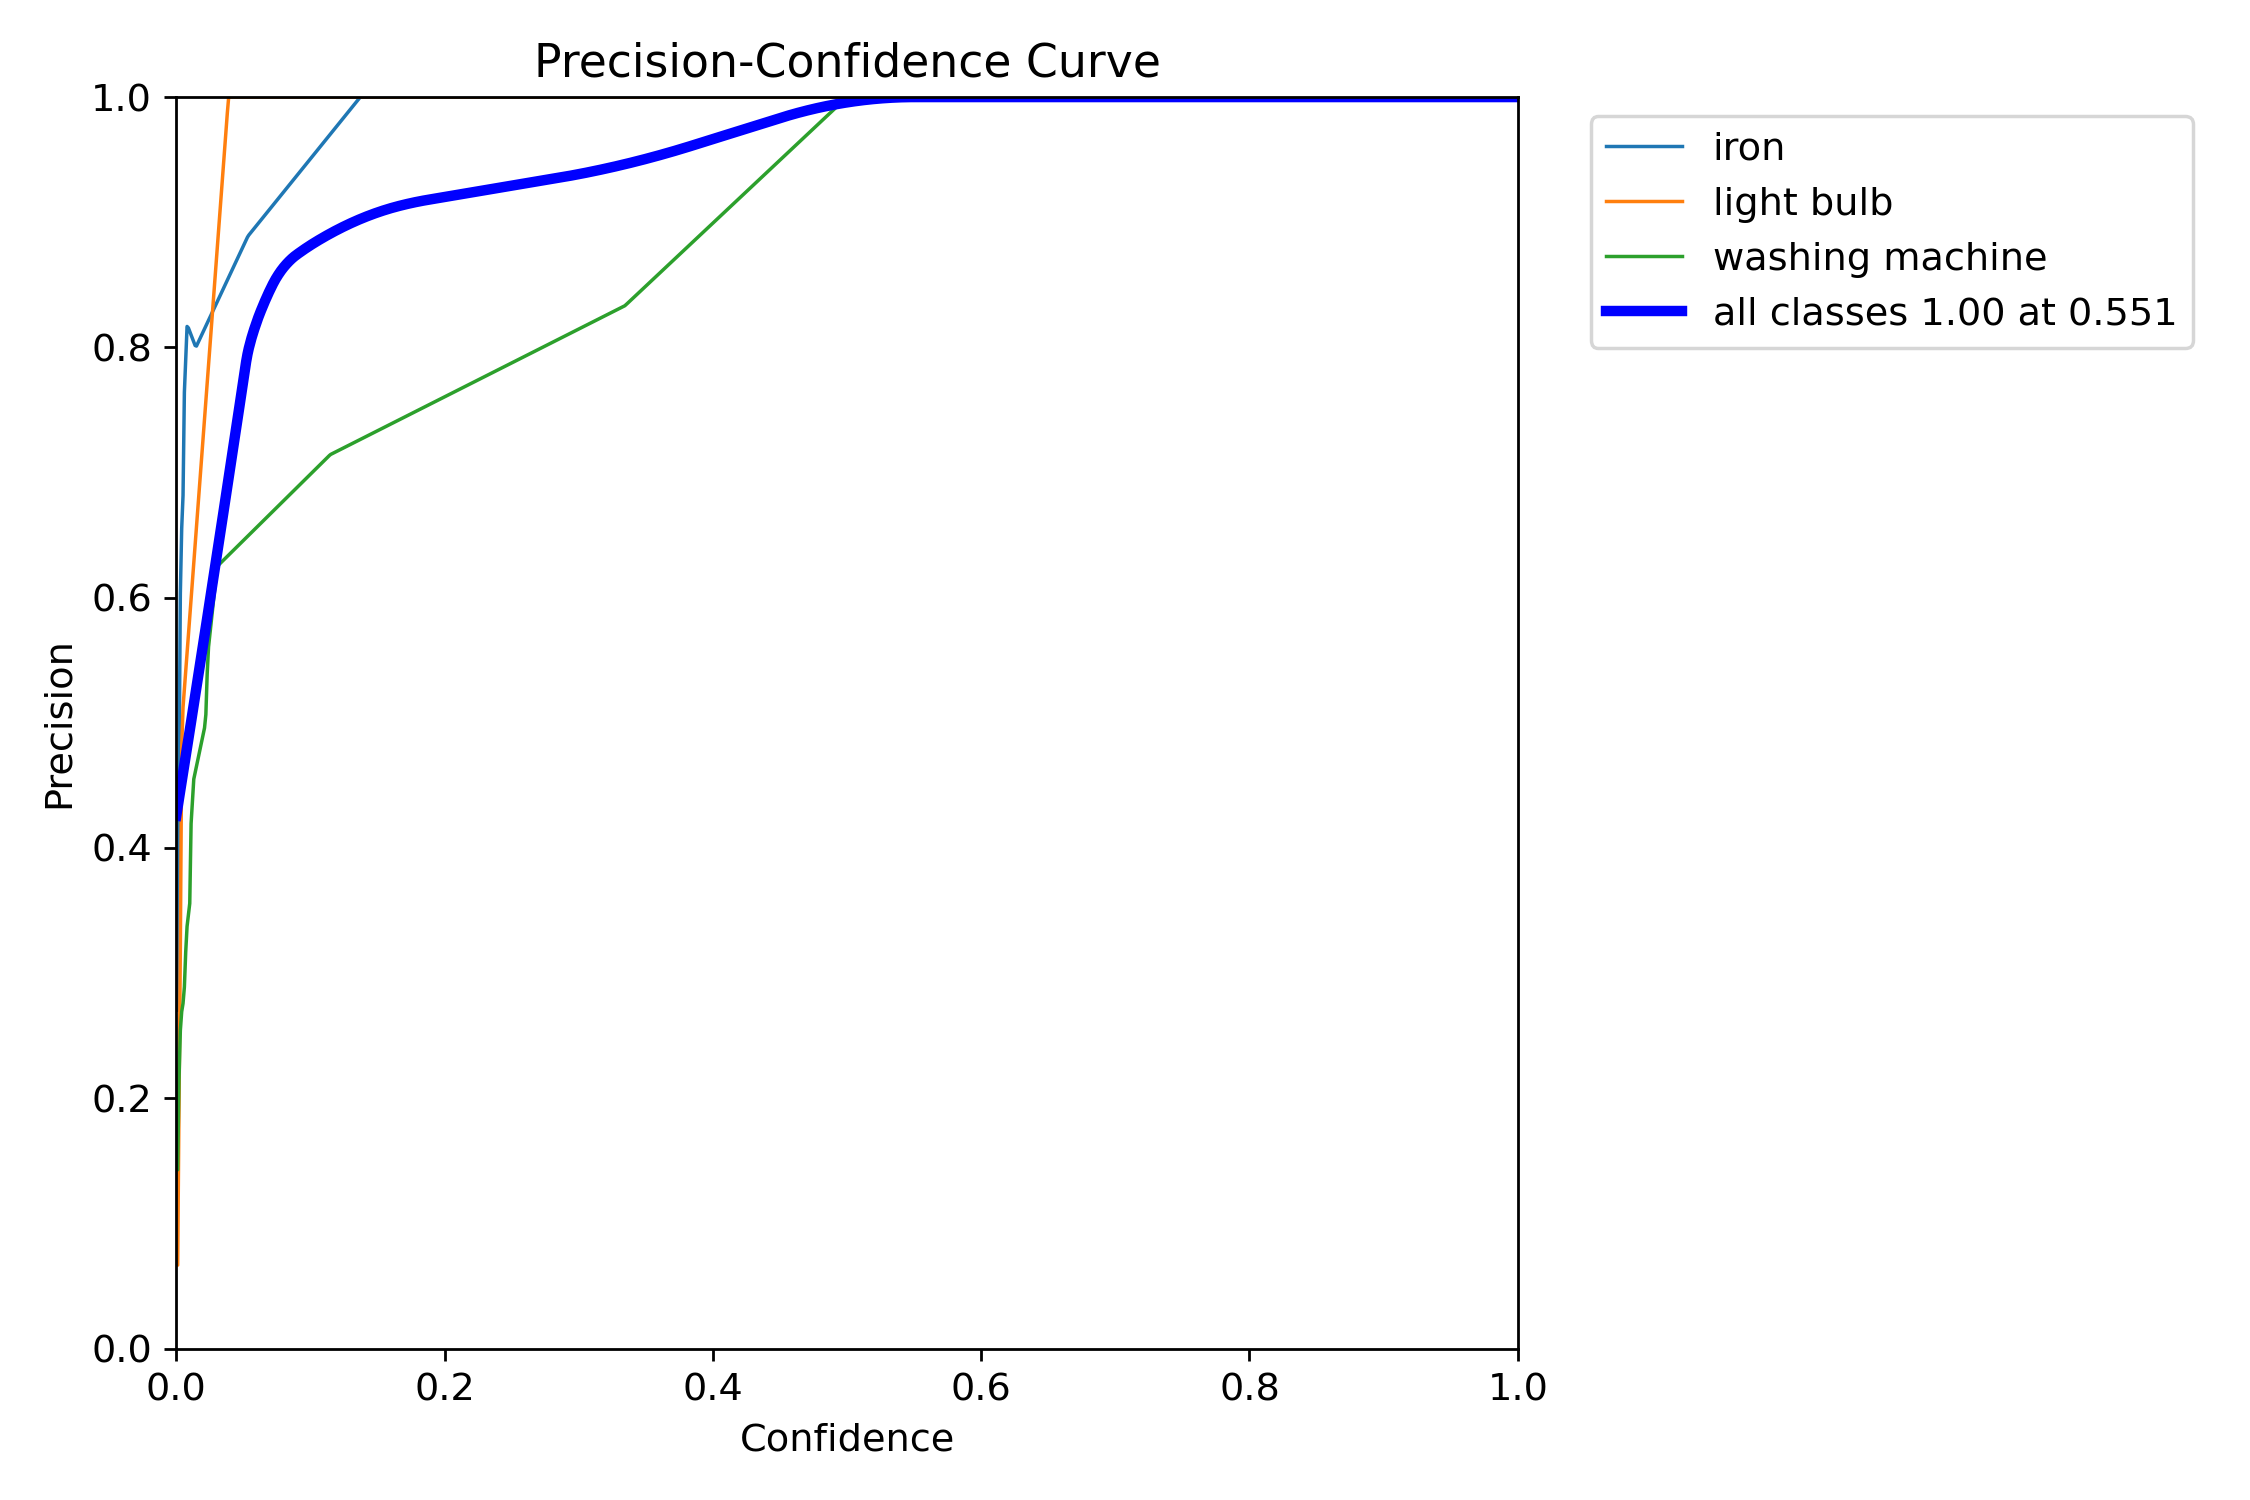

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/P_curve.png', width=1000)

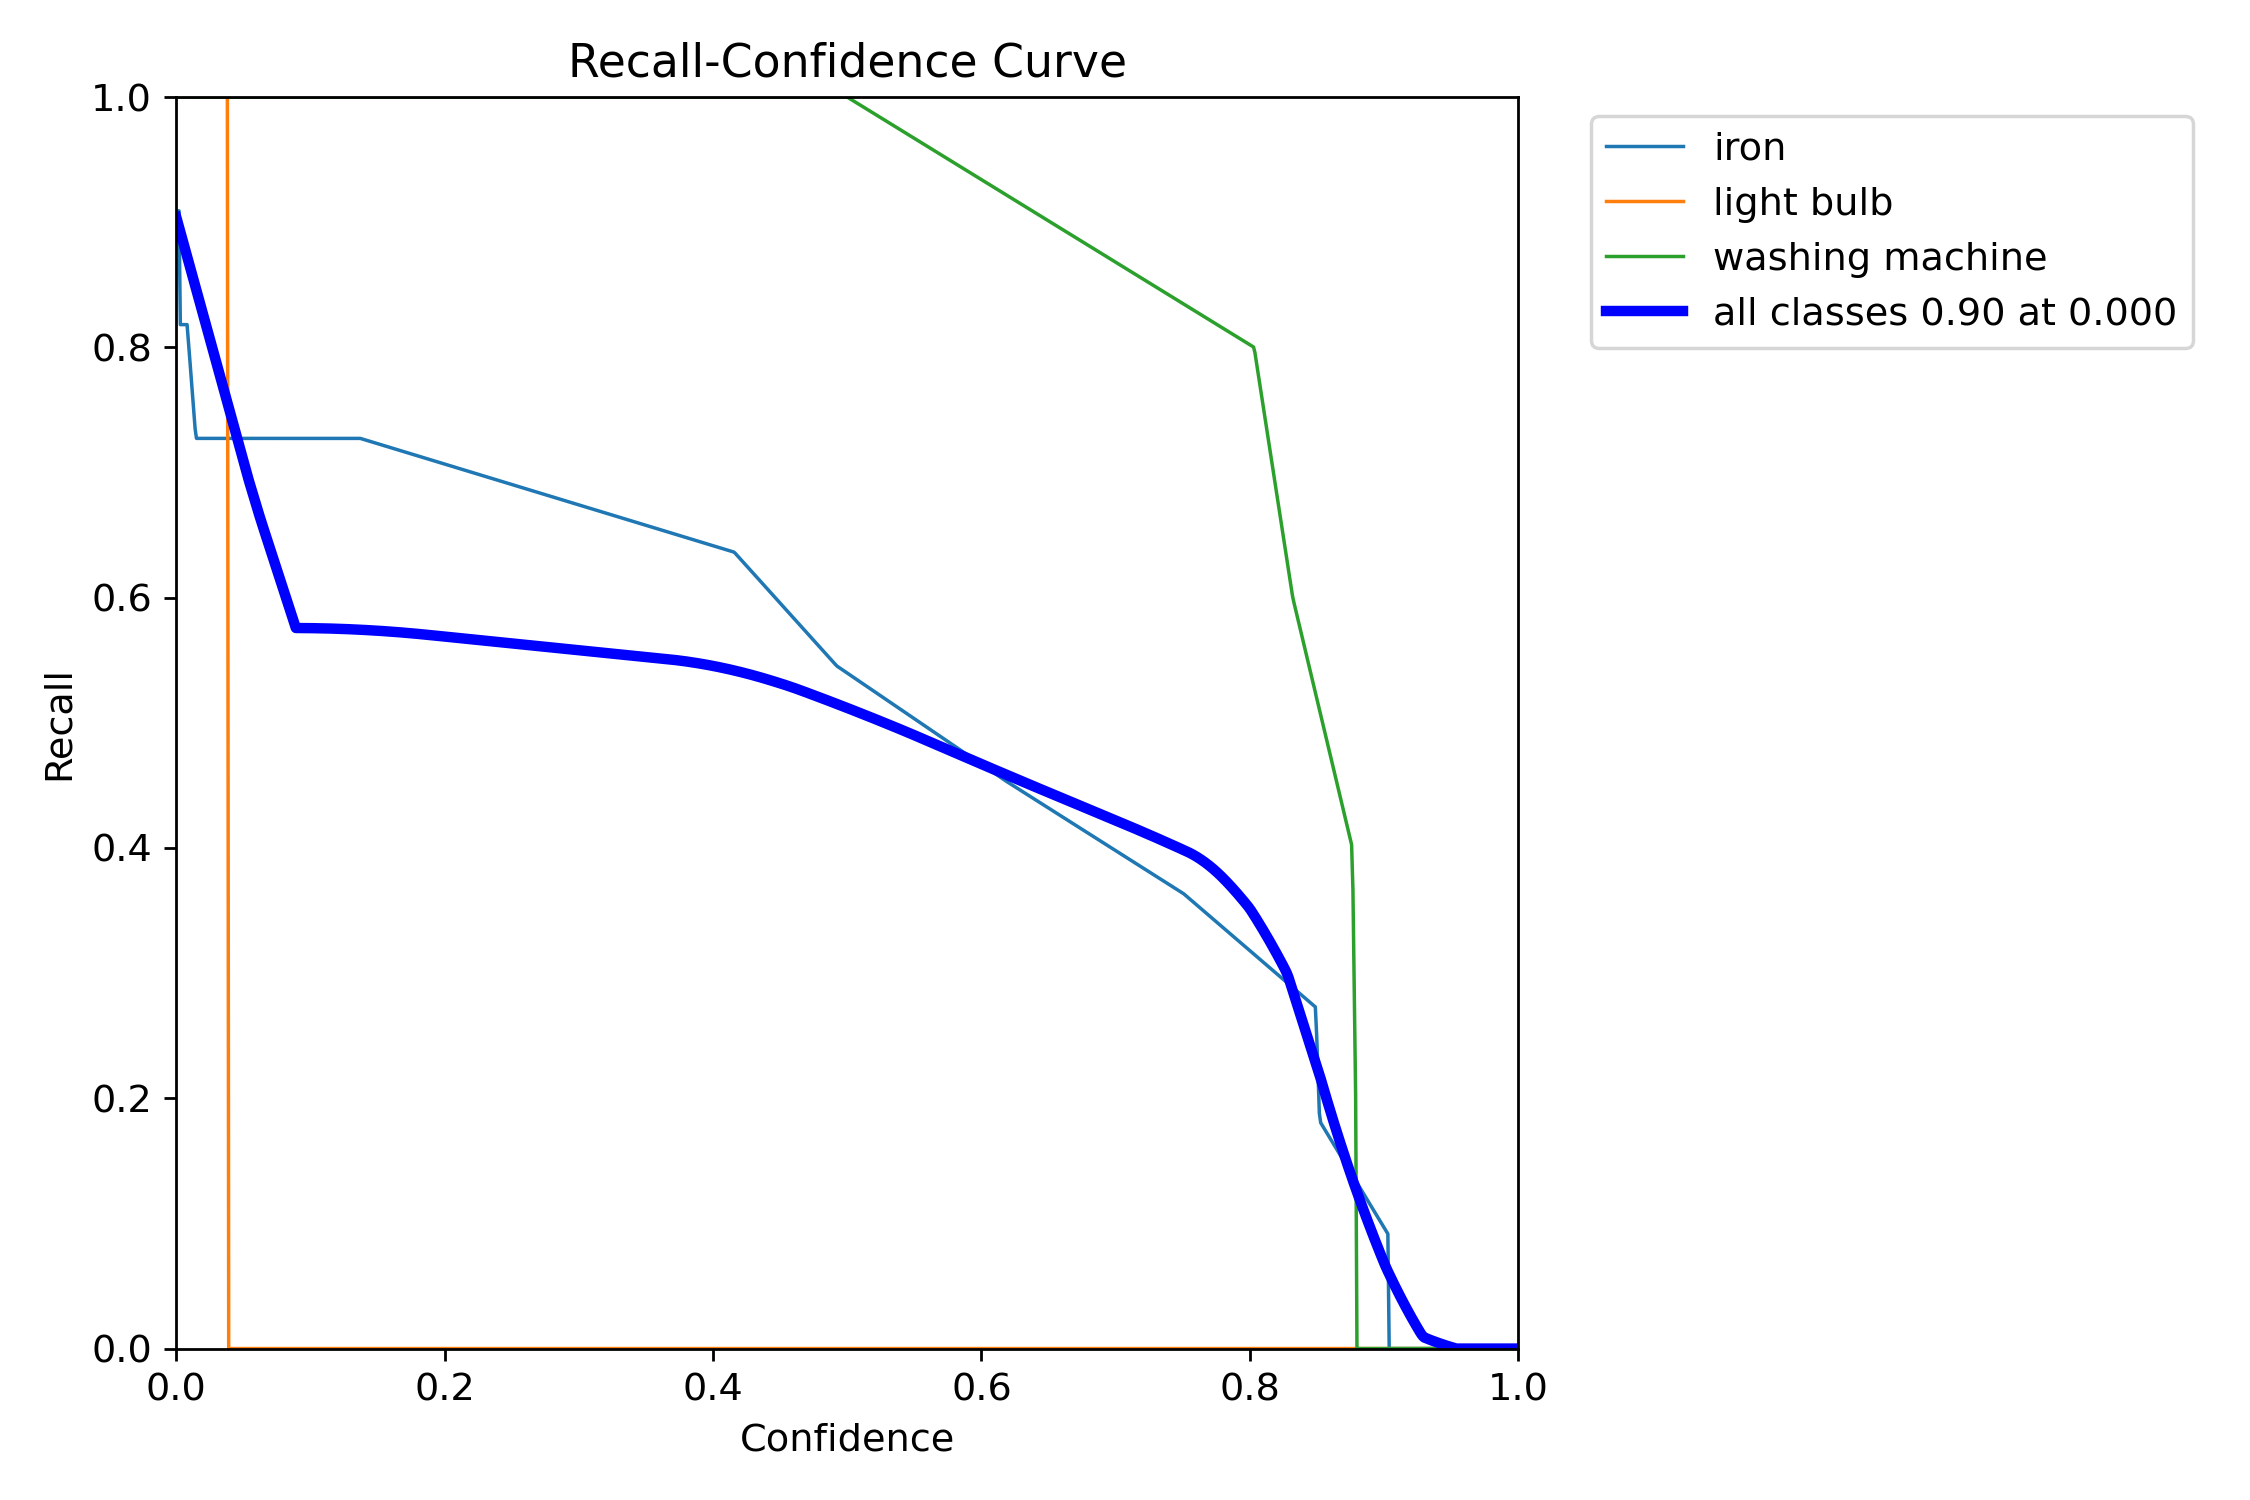

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/R_curve.png', width=1000)

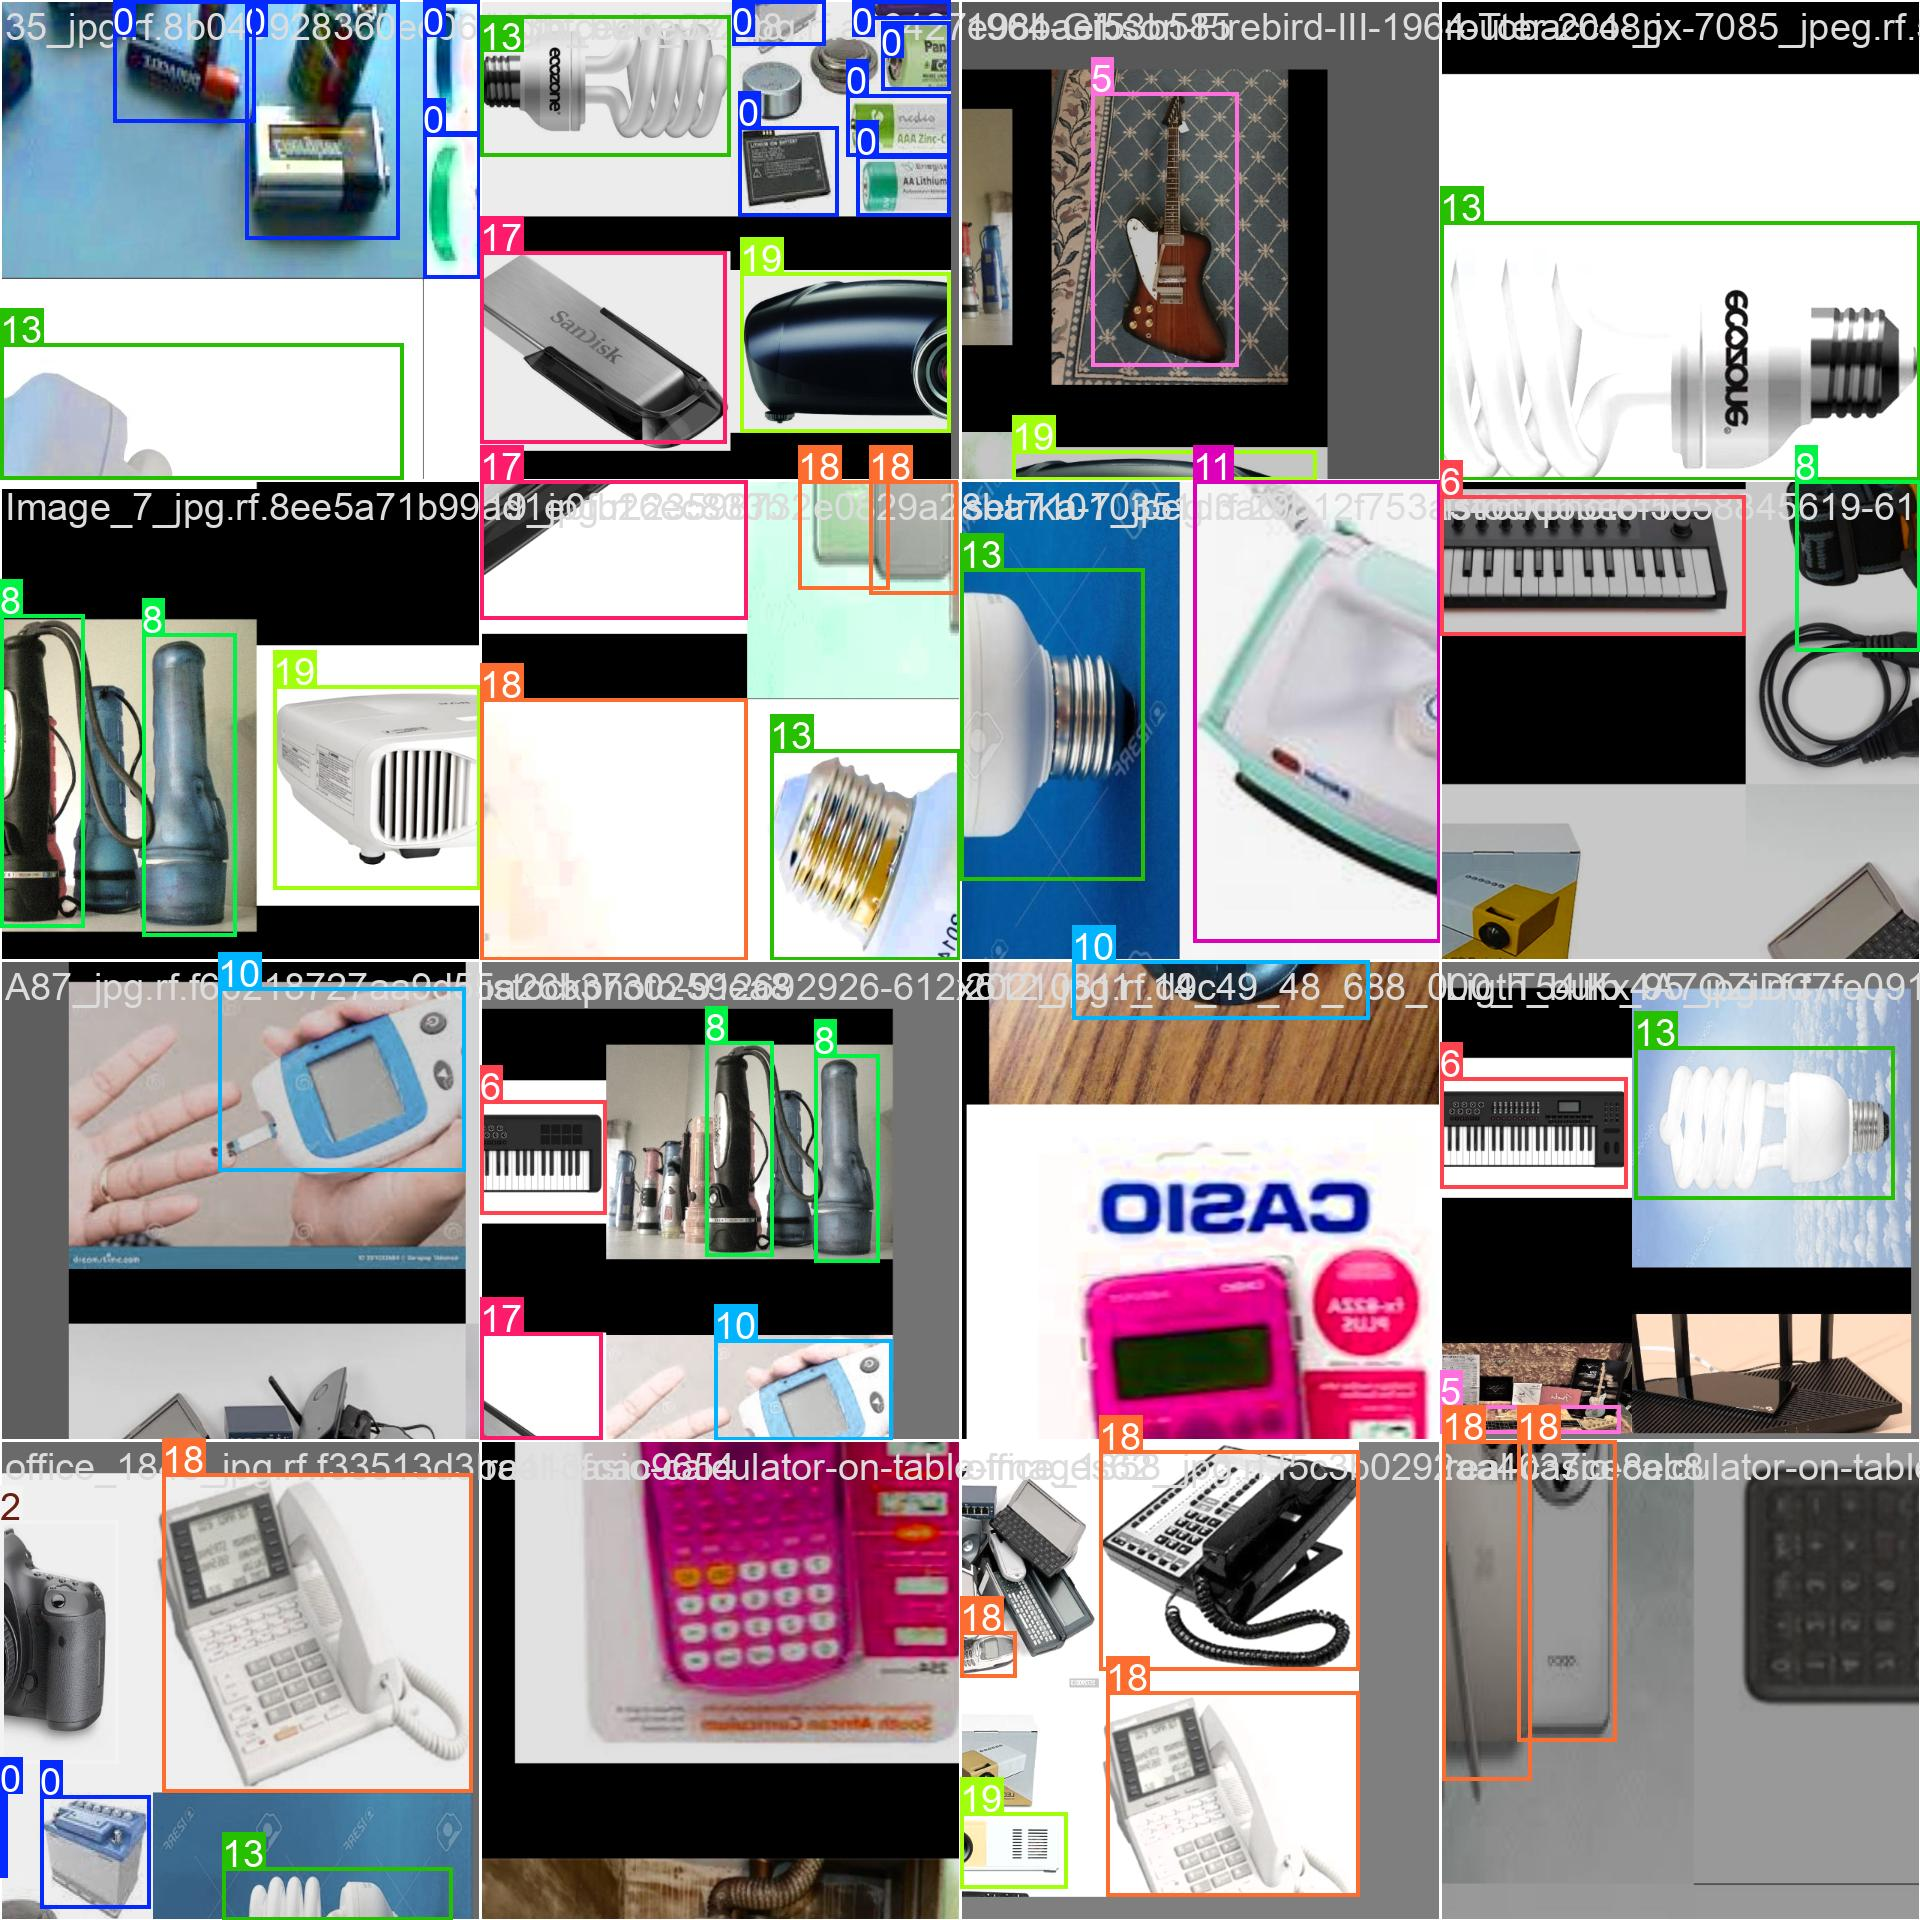

In [ ]:

from IPython.display import Image

Image(filename=f'/content/runs/detect/train/train_batch2.jpg', width=1000)

In [1]:
!pip install onnxruntime onnx onnxruntime-tools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.8 MB/s eta 0:00:00


In [3]:
import os
import time
import numpy as np
import onnxruntime as ort
from onnxruntime.quantization import QuantType

input_model_path = 'best.onnx'
output_model_path = 'quantized_best.onnx'

original_size_mb = os.path.getsize(input_model_path) / (1024 * 1024)
print(f"Original ONNX size: {original_size_mb:.2f} MB")


def quantize_onnx_model(onnx_model_path, quantized_model_path):
    from onnxruntime.quantization import QuantFormat, quantize_static
    from onnxruntime.quantization.calibrate import CalibrationDataReader

    class DummyDataReader(CalibrationDataReader):
        def __init__(self):
            self.iterator = iter([{'input.1': np.random.rand(1, 3, 640, 640).astype(np.float32)} for _ in range(10)])

        def get_next(self):
            return next(self.iterator, None)

    dr = DummyDataReader()

    quantize_static(
        onnx_model_path,
        quantized_model_path,
        dr,
        quant_format=QuantFormat.QDQ,
        activation_type=QuantType.QUInt8,
        weight_type=QuantType.QInt8,
        op_types_to_quantize=['Conv', 'MatMul', 'Add'],
        extra_options={'EnableSubgraph': False}
    )


quantize_onnx_model(input_model_path, output_model_path)

quantized_size_mb = os.path.getsize(output_model_path) / (1024 * 1024)
print(f"Quantized ONNX size: {quantized_size_mb:.2f} MB")
print(f"Size reduction: {(1 - quantized_size_mb/original_size_mb)*100:.2f}%")

def evaluate_model(model_path, test_input):
    sess_options = ort.SessionOptions()
    sess_options.graph_optimization_level = ort.GraphOptimizationLevel.ORT_ENABLE_ALL

    try:
        session = ort.InferenceSession(model_path, sess_options, providers=['CPUExecutionProvider'])
    except:
        session = ort.InferenceSession(model_path, sess_options)

    input_name = session.get_inputs()[0].name


    for _ in range(5):
        session.run(None, {input_name: test_input})

    latencies = []
    for _ in range(100):
        start_time = time.perf_counter()
        session.run(None, {input_name: test_input})
        latencies.append(time.perf_counter() - start_time)

    avg_latency = np.mean(latencies) * 1000
    std_latency = np.std(latencies) * 1000
    return avg_latency, std_latency


test_image = np.random.rand(1, 3, 640, 640).astype(np.float32)

orig_latency, orig_std = evaluate_model(input_model_path, test_image)

quant_latency, quant_std = evaluate_model(output_model_path, test_image)


Original ONNX size: 9.89 MB


Quantized ONNX size: 2.93 MB
Size reduction: 70.42%


In [5]:
!unzip -o /content/runs.zip -d /content/runs


Archive:  /content/runs.zip
   creating: /content/runs/content/runs/
   creating: /content/runs/content/runs/detect/
   creating: /content/runs/content/runs/detect/val/
  inflating: /content/runs/content/runs/detect/val/P_curve.png  
  inflating: /content/runs/content/runs/detect/val/val_batch1_labels.jpg  
  inflating: /content/runs/content/runs/detect/val/PR_curve.png  
  inflating: /content/runs/content/runs/detect/val/val_batch0_labels.jpg  
  inflating: /content/runs/content/runs/detect/val/R_curve.png  
  inflating: /content/runs/content/runs/detect/val/confusion_matrix_normalized.png  
  inflating: /content/runs/content/runs/detect/val/val_batch1_pred.jpg  
  inflating: /content/runs/content/runs/detect/val/val_batch0_pred.jpg  
  inflating: /content/runs/content/runs/detect/val/F1_curve.png  
  inflating: /content/runs/content/runs/detect/val/confusion_matrix.png  
   creating: /content/runs/content/runs/detect/predict/
  inflating: /content/runs/content/runs/detect/predict/10.

In [24]:
!yolo task=detect mode=predict model=/content/content/runs/detect/train/weights/best.pt conf=0.18 source=/content/2.jpg save=True

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 159 layers, 2,561,213 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/2.jpg: 448x640 14 phones, 274.8ms
Speed: 7.9ms preprocess, 274.8ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


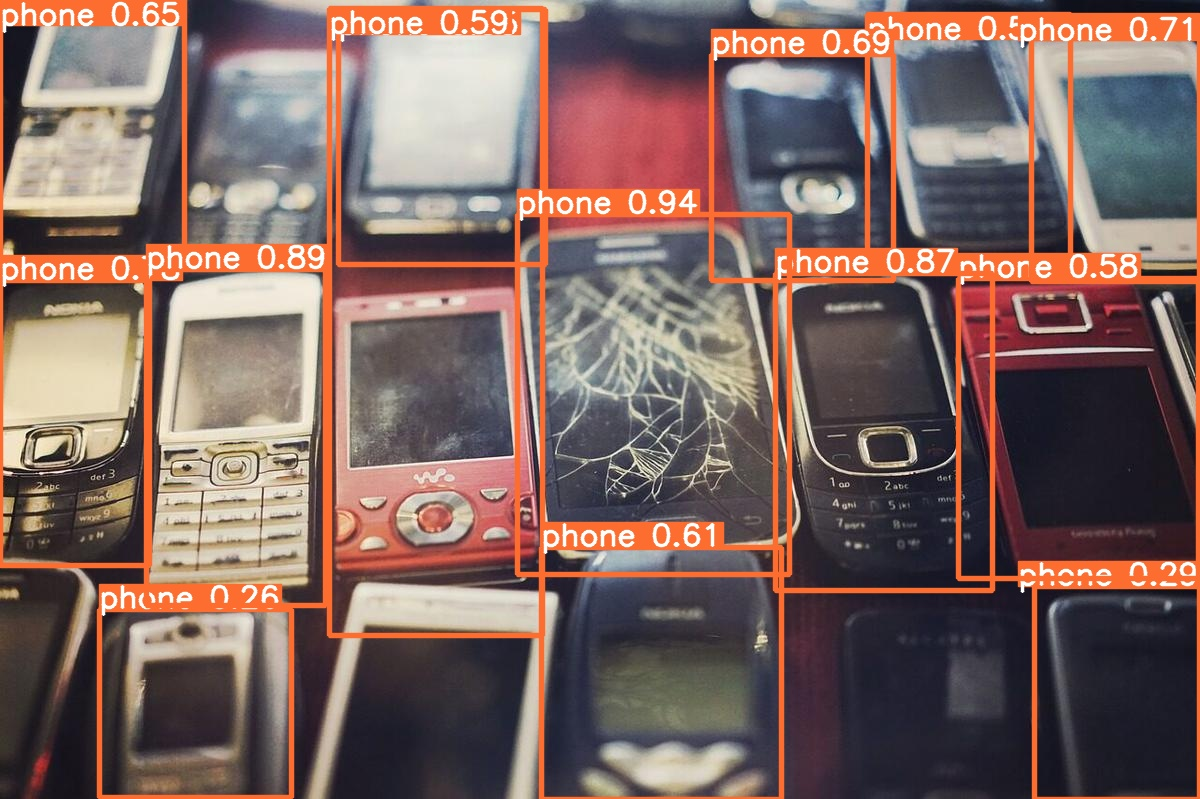

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict7*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")

In [32]:
!yolo task=detect mode=predict model=/content/content/runs/detect/train/weights/best.pt conf=0.18 source=/content/6.jpg save=True

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 159 layers, 2,561,213 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/6.jpg: 448x640 3 laptops, 216.4ms
Speed: 6.3ms preprocess, 216.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict11
💡 Learn more at https://docs.ultralytics.com/modes/predict


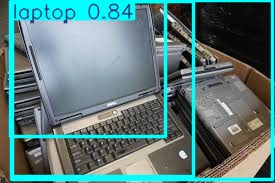

In [33]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict11*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")